In [1]:
#importing necessary libaries
import pandas as pd
import numpy as np
import math

#for visualisation
import matplotlib.pyplot as plt

#for scaling,metrics and tensorflow
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#for building LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM



In [5]:
dataset=pd.read_csv("tesla data.csv")

In [6]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Cumulative Open,Price Change,Unnamed: 9
0,0,29-08-2022,282.829987,287.739990,280.700012,284.820007,284.820007,41864700,282.829987,NaN
1,1,30-08-2022,287.869995,288.480011,272.649994,277.700012,277.700012,50541800,570.699982,5.040009
2,2,31-08-2022,280.619995,281.250000,271.809998,275.609985,275.609985,52107300,851.319977,-7.250000
3,3,01-09-2022,272.579987,277.579987,266.149994,277.160004,277.160004,54287000,1123.899963,-8.040009
4,4,02-09-2022,281.070007,282.350006,269.079987,270.209992,270.209992,50890100,1404.969971,8.490021


In [7]:
#choosing the required feature
closed_price=df['Close']
closed_price.head()


0    280.700012
1    272.649994
2    271.809998
3    266.149994
4    269.079987
Name: Close, dtype: float64

In [8]:
sc=MinMaxScaler()
closed_price=sc.fit_transform(np.array(closed_price).reshape(-1,1)).squeeze()



In [9]:
train_size=int(len(closed_price)*0.8)
test_size=len(closed_price)-train_size

train,test=closed_price[0:train_size],closed_price[train_size:len(closed_price)]

In [10]:
def create(dataset,seq_len):
    x,y=[],[]
    for i in range(len(dataset)-seq_len-1):
        x.append(dataset[i:i+seq_len])
        y.append(dataset[i+seq_len])
    return np.array(x),np.array(y)

seq_len=10
xtrain,ytrain=create(train,seq_len)
xtest,ytest=create(test,seq_len)


In [11]:
#reshape input to be [samples,time,steps,features]
xtrain=np.reshape(xtrain,(xtrain.shape[0],1,xtrain.shape[1]))
xtest=np.reshape(xtest,(xtest.shape[0],1,xtest.shape[1]))


In [12]:
#building model
model=Sequential()
model.add(LSTM(4,input_shape=(1,seq_len)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(xtrain,ytrain,epochs=100,batch_size=300,verbose=1)

Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.3356
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3361
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 0.3205
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3260
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3068
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 0.3027
Epoch 7/100
1/1 [==============================] - 0s 32ms/step - loss: 0.3087
Epoch 8/100
1/1 [==============================] - 0s 22ms/step - loss: 0.3031
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 0.3013
Epoch 10/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2865
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 0.2924
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 0.2897
Epoch 13/100
1/1 [==============================] - 

In [13]:
#prediction
trainpredict=model.predict(xtrain)
testpredict=model.predict(xtest)


2/2 [==============================] - 0s 8ms/step


In [14]:
trainpredict=sc.inverse_transform(trainpredict)
ytrain=sc.inverse_transform([ytrain])
testpredict=sc.inverse_transform(testpredict)
ytest=sc.inverse_transform([ytest])


In [15]:
#finding out RMSE value

trainscore=math.sqrt(mean_squared_error(ytrain[0],trainpredict[:,0]))
print("trainscore: %.2f "%(trainscore))
testscore=math.sqrt(mean_squared_error(ytest[0],testpredict[:,0]))
print("test score: %.2f "%(testscore))


trainscore: 50.41 
test score: 95.81 


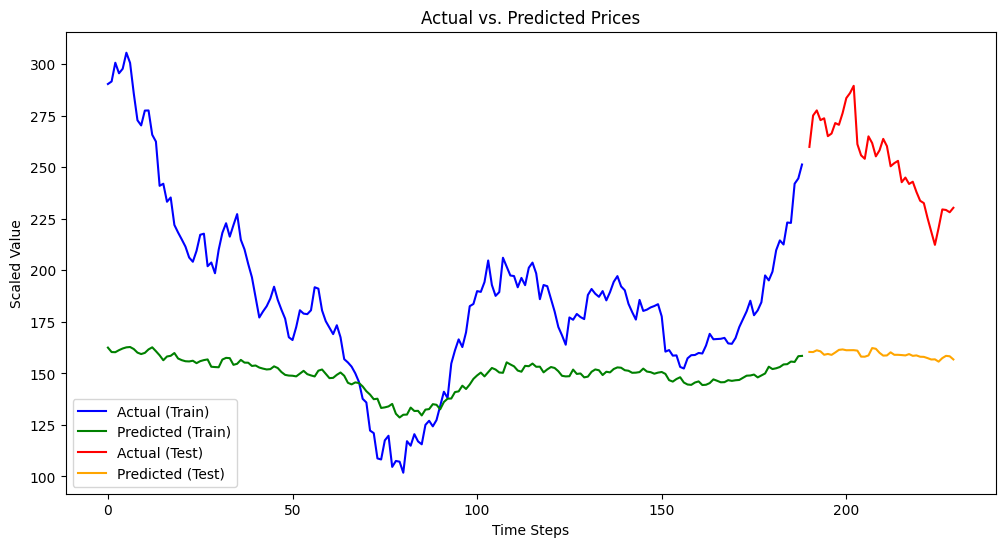

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(ytrain[0], label='Actual (Train)', color='blue')
plt.plot(trainpredict[:, 0], label='Predicted (Train)', color='green')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), ytest[0], label='Actual (Test)', color='red')
plt.plot(len(ytrain[0]) + np.arange(1, len(ytest[0]) + 1), testpredict[:, 0], label='Predicted (Test)', color='orange')
plt.xlabel('Time Steps')
plt.ylabel('Scaled Value')
plt.legend()
plt.title('Actual vs. Predicted Prices')
plt.show()
